## First Part - the same as in the Cross-lingual experiments

In [64]:
import pandas as pd
import numpy as np

In [65]:
# The CORE dataset that we obtained was split into train, dev and test split. First, we merged the splits.

train_df = pd.read_table("G:/My Drive/Institut Jozef Stefan/Projekti na Institutu/Določanje žanrov/Mapping to CORE/Corpora/Original CORE files/train.tsv")
train_df.columns = ["label", "text"]


train_df["split"] = "train"
train_df.head()

,label,text,split
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train
1,NA NE,"Ferry consultation needs deeper questions, say...",train
2,ID DF,I'v been recording and mixing music for about ...,train
3,NA SR,The 25-year-old did have chances at Anfield. B...,train
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train


In [66]:
test_df = pd.read_csv("G:/My Drive/Institut Jozef Stefan/Projekti na Institutu/Določanje žanrov/Mapping to CORE/Corpora/Original CORE files/test.tsv", sep="\t")
test_df.columns = ["label", "text"]

test_df["split"] = "test"
test_df.head()

,label,text,split
0,IN OI,DEFINITION About a quarter of the world drives...,test
1,OP OB,How should retail investors own gold? Mostly p...,test
2,NA NE,Famed railway leader Hunter Harrison said he i...,test
3,NA NE,Louis Walsh also claimed that Gary Barlow and ...,test
4,OP OB,"Essays on economic crisis, decoding dominant i...",test


In [67]:
dev_df = pd.read_csv("G:/My Drive/Institut Jozef Stefan/Projekti na Institutu/Določanje žanrov/Mapping to CORE/Corpora/Original CORE files/dev.tsv", sep="\t")
dev_df.columns = ["label", "text"]

dev_df["split"] = "dev"
dev_df.head()

,label,text,split
0,OP OB,Being a Successful Band Has Nothing to Do With...,dev
1,NA IN NE DP,'I always like to think of myself as a cartoon...,dev
2,NA SR,QPR vs Southampton - Match preview and team ne...,dev
3,NA NE,Search age: Search in: US says it's ready to t...,dev
4,IN OP DT,Welcome to India Here at The Great Recovery HQ...,dev


In [68]:
dataset_df = train_df.append(test_df,ignore_index = True)

dataset_df.head()

,label,text,split
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train
1,NA NE,"Ferry consultation needs deeper questions, say...",train
2,ID DF,I'v been recording and mixing music for about ...,train
3,NA SR,The 25-year-old did have chances at Anfield. B...,train
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train


In [69]:
dataset_df = dataset_df.append(dev_df, ignore_index = True)

dataset_df.tail()

,label,text,split
48444,NA NE,Lollapalooza heading to the Middle East in 201...,dev
48445,OP AV,How to: Improve Brand Engagement on Twitter Ea...,dev
48446,OP OB,The Last Post. A shameful reflection on Canada...,dev
48447,NA NE,Related Stories Students at a Sherwood Park hi...,dev
48448,IN OP,2009 September 14th The folks over at VGBlogge...,dev


In [70]:
dataset_df.describe()

,label,text,split
count,48449,48432,48449
unique,460,48420,3
top,NA NE,Magdalen Top of the Norrington Table Magdalen ...,train
freq,9872,2,33914


In [71]:
# Check whether there are any empty cells
dataset_df[dataset_df.isnull().any(axis=1)]

,label,text,split
93,IN DT,NaN,train
300,IN DT,NaN,train
6436,IN DT,NaN,train
11816,ID DF,NaN,train
13802,NA NE,NaN,train
14133,IN,NaN,train
20588,SP OS,NaN,train
22072,ID QA,NaN,train
23191,LY PO,NaN,train
32198,ID DF,NaN,train


In [72]:
# Delete rows with empty cells
dataset_df.dropna(subset=["text"], inplace=True)
dataset_df.describe()

,label,text,split
count,48432,48432,48432
unique,459,48420,3
top,NA NE,Magdalen Top of the Norrington Table Magdalen ...,train
freq,9871,2,33904


In [73]:
dataset_df[dataset_df.text.duplicated(keep=False)].sort_values("text") 

,label,text,split
3475,ID DF,David Icke has fallen into the trap of using t...,train
26622,ID DF,David Icke has fallen into the trap of using t...,train
28330,NA DP,Hobbit star's Wellington sojourn James Nesbitt...,train
27701,NA DP,Hobbit star's Wellington sojourn James Nesbitt...,train
1777,LY SL,If it's really over and there's nothing I can ...,train
39061,LY SL,If it's really over and there's nothing I can ...,test
13456,NA NE,It's Obama all the way for Oxford's U.S. expat...,train
33158,NA NE,It's Obama all the way for Oxford's U.S. expat...,train
3617,ID,"Just back from our very first safari, which wa...",train
26800,ID DF,"Just back from our very first safari, which wa...",train


In [74]:
dataset_df.drop_duplicates("text",inplace=True)
dataset_df.describe() 

,label,text,split
count,48420,48420,48420
unique,459,48420,3
top,NA NE,The Top TEN 'Whiniest Sets of Fans' in English...,train
freq,9865,1,33898


In [75]:
main_labels = ["IN", "OP", "NA", "IP", "ID", "HI", "LY", "SP", "OTHER"]

In [76]:
list_label = list(dataset_df.label)
len(list_label)

48420

In [77]:
list_label[:10]

['NA OP SR OB',
 'NA NE',
 'ID DF',
 'NA SR',
 'NA IN HA',
 'NA NE',
 'ID DF',
 'NA PB',
 'OP RV',
 'NA NE']

In [78]:
main_labels_list = []
sublabels_list = []

for instance in list_label:
    label = instance.split()
    current_list = [word for word in label if word in main_labels]
    current_string = " ".join(current_list)
    main_labels_list.append(current_string)

    current_sublist = [word for word in label if word not in main_labels]
    current_sub_string = " ".join(current_sublist)
    sublabels_list.append(current_sub_string)

print(len(sublabels_list))
print(len(main_labels_list))


48420
48420


In [79]:
dataset_df["main_labels"] = main_labels_list
dataset_df["sublabels"] = sublabels_list

dataset_df.head()

,label,text,split,main_labels,sublabels
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA


In [80]:
dataset_df.describe()

,label,text,split,main_labels,sublabels
count,48420,48420,48420,48420,48420
unique,459,48420,3,35,296
top,NA NE,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA,NE
freq,9865,1,33898,17659,10503


In [81]:
#Calculate number of labels for each instance
dataset_df['Len'] = dataset_df['label'].str.count(' ') + 1
dataset_df.head()

,label,text,split,main_labels,sublabels,Len
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA,3


In [82]:
#Calculate number of main labels for each instance
dataset_df['main_len'] = dataset_df['main_labels'].str.count(' ') + 1
dataset_df.head()

,label,text,split,main_labels,sublabels,Len,main_len
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA,3,2


In [83]:
#Calculate number of sub-labels for each instance
dataset_df['sub_len'] = dataset_df['sublabels'].str.count(' ') + 1
dataset_df.head()

,label,text,split,main_labels,sublabels,Len,main_len,sub_len
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2,2
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1,1
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA,3,2,1


In [84]:
GINCORE_mappings = {'NA NE':'News', 'ID DF': 'Forum', 'NA SR': 'News', 'NA PB': 'Opinion/Argumentation', 'OP RV':'Review', 'OP RS':'Opinion/Argumentation', 'IN RA':'Research Article','OP OB':'Opinion/Argumentation', 'IN DT':'discard', 'IN': 'Information/Explanation', 'IN OI':'Information/Explanation', 'NA HA':'Information/Explanation', 'OP':'Opinion/Argumentation', 'LY SL':'Lyrical', 'IP DS':'Promotion',
'OTHER':'discard', 'HI HT':'Instruction', 'OP AV':'Opinion/Argumentation', 'NA MA':'discard', 'HI FH':'FAQ', 'IN EN':'Information/Explanation', 'NA SS':'Prose',
'SP IT':'Interview', 'NA ': 'discard', 'IN DP':'Information/Explanation', 'NA TB':'Opinion/Argumentation', 'IN IB':'discard', 'OP LE':'discard', 'ID QA':'Forum','IN FI':'FAQ', 'SP FS':'Opinion/Argumentation', 'OP ID':'discard', 'ID RR':'Forum', 'IP PA':'Opinion/Argumentation', 'IN CM':'Information/Explanation', 'IN IP':'discard','NA DP':'discard', 'IN LT':'Legal/Regulation', 'NA IN':'discard', 'IN OP':'discard', 'IP':'discard', 'HI RE':'Recipe', 'HI':'discard', 'ID':'Forum',
'NA OP':'discard', 'LY PO':'Lyrical', 'IP ED':'Opinion/Argumentation', 'SP TA':'discard', 'NA IP':'discard', 'IN ID':'discard', 'IN HI':'discard',
'HI TS':'Instruction', 'IN TR':'discard', 'SP':'discard', 'IP OE':'discard', 'SP OS':'discard', 'LY PR':'Lyrical', 'OP HI':'discard',
'SP TV':'Script/Drama', 'OP AD':'Promotion', 'OP OO':'discard', 'OP DP':'discard', 'ID HI':'discard', 'OP IP':'discard', 'LY OL':'Lyrical',
'LY': 'Lyrical', 'NA ON':'discard', 'OP LY':'discard', 'HI OH':'discard', 'ID OF':'Forum', 'IN SP':'discard', 'HI LY':'discard',
'NA HI':'discard', 'ID IP':'discard', 'NA ID':'discard', 'NA SP':'discard', 'IN LY':'discard'}

In [85]:
# Map the GINCORE labels to the original labels
dataset_df["GINCORE"] = dataset_df["label"]
dataset_df["GINCORE"].replace(GINCORE_mappings, inplace=True)

dataset_df.head()

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2,2,NA OP SR OB
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1,1,News
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA,3,2,1,NA IN HA


In [174]:
# Add the full names of abbreviated labels
# Import the table with the mapping
abr_mapping = pd.read_csv("data/CORE-abbreviations-maping-subcategories-only.txt", sep = "\t")

abr_mapping

,Abbreviations,CORE
0,FH,FAQ about How-to
1,HT,How-to
2,OH,Other How-to
3,RE,Recipe
4,TS,Technical Support
...,...,...
331,NaN,NaN
332,NaN,NaN
333,NaN,NaN
334,NaN,NaN


In [175]:
abr_mapping.columns

Index(['Abbreviations', 'CORE'], dtype='object')

In [176]:
# Discard empty rows
abr_mapping.dropna(subset=["CORE"], inplace = True)

abr_mapping

,Abbreviations,CORE
0,FH,FAQ about How-to
1,HT,How-to
2,OH,Other How-to
3,RE,Recipe
4,TS,Technical Support
5,DF,Discussion Forum
6,OF,Other Forum
7,QA,Question/Answer Forum
8,RR,Reader/Viewer Responses
9,CM,Course Materials


In [177]:
# Create a mapping
core_dict = {x:y for x,y in zip(abr_mapping["Abbreviations"], abr_mapping["CORE"])}

core_dict

{'FH': 'FAQ about How-to',
 'HT': 'How-to',
 'OH': 'Other How-to',
 'RE': 'Recipe',
 'TS': 'Technical Support',
 'DF': 'Discussion Forum',
 'OF': 'Other Forum',
 'QA': 'Question/Answer Forum',
 'RR': 'Reader/Viewer Responses',
 'CM': 'Course Materials',
 'DP': 'Description of a Person',
 'DT': 'Description of a Thing',
 'EN': 'Encyclopedia Article',
 'FI': 'FAQ about Information',
 'IB': 'Information Blog',
 'LT': 'Legal terms',
 'OI': 'Other Information',
 'RA': 'Research Article',
 'TR': 'Technical Report',
 'DS': 'Description with Intent to Sell',
 'ED': 'Editorial',
 'OE': 'Other Informational Persuasion',
 'PA': 'Persuasive Article or Essay',
 'OL': 'Other Lyrical',
 'PO': 'Poem',
 'PR': 'Prayer',
 'SL': 'Song Lyrics',
 'HA': 'Historical Article',
 'MA': 'Magazine Article',
 'NE': 'News Report/Blog',
 'ON': 'Other Narrative',
 'PB': 'Personal Blog',
 'SR': 'Sports Report',
 'SS': 'Short Story',
 'TB': 'Travel Blog',
 'AD': 'Advertisement',
 'AV': 'Advice',
 'LE': 'Letter to Editor

In [180]:
# Apply the mapping to the dataset
dataset_df["full_names"] = dataset_df['sublabels'].map(core_dict).fillna(dataset_df['sublabels'])

dataset_df.head(3)

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2,2,NA OP SR OB,SR OB,NA OP
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News,News Report/Blog,Narrative
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion


In [146]:
# Add the dictionary for main labels only
main_labels_dict = main_labels = {"IN":"Informational Description/Explanation", "OP":"Opinion", "NA": "Narrative", "IP":"Informational Persuasion", "ID":"Interactive Discussion", "HI":"How-To/Instructional", "LY":"Lyrical", "SP":"Spoken", "OTHER":"Other"}

In [147]:
dataset_df["main_labels_full_names"] = dataset_df['main_labels'].map(main_labels_dict).fillna(dataset_df['main_labels'])

dataset_df

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2,2,NA OP SR OB,NA OP SR OB,NA OP
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News,News Report/Blog,Narrative
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1,1,News,Sports Report,Narrative
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA,3,2,1,NA IN HA,NA IN HA,NA IN
...,...,...,...,...,...,...,...,...,...,...,...
48444,NA NE,Lollapalooza heading to the Middle East in 201...,dev,NA,NE,2,1,1,News,News Report/Blog,Narrative
48445,OP AV,How to: Improve Brand Engagement on Twitter Ea...,dev,OP,AV,2,1,1,Opinion/Argumentation,Advice,Opinion
48446,OP OB,The Last Post. A shameful reflection on Canada...,dev,OP,OB,2,1,1,Opinion/Argumentation,Opinion Blog,Opinion
48447,NA NE,Related Stories Students at a Sherwood Park hi...,dev,NA,NE,2,1,1,News,News Report/Blog,Narrative


In [181]:
# Save the spreadsheet
dataset_df.to_csv("CORE-all-information.csv", sep="\t")

## Second Part - preparation of the CORE-main and CORE-sub

### CORE-main

Here, we will use the main CORE categories. We will perform single-label experiments, so we will discard all instances with more than one category.

In [148]:
core_main = dataset_df[dataset_df["main_len"] == 1]
core_main

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News,News Report/Blog,Narrative
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1,1,News,Sports Report,Narrative
5,NA NE,The value of NYC housing construction starts m...,train,NA,NE,2,1,1,News,News Report/Blog,Narrative
6,ID DF,"If this is your first visit, be sure to check ...",train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion
...,...,...,...,...,...,...,...,...,...,...,...
48443,NA,"As a prisoner of war in Vietnam, Eagle Scout G...",dev,NA,,2,1,1,discard,NA,Narrative
48444,NA NE,Lollapalooza heading to the Middle East in 201...,dev,NA,NE,2,1,1,News,News Report/Blog,Narrative
48445,OP AV,How to: Improve Brand Engagement on Twitter Ea...,dev,OP,AV,2,1,1,Opinion/Argumentation,Advice,Opinion
48446,OP OB,The Last Post. A shameful reflection on Canada...,dev,OP,OB,2,1,1,Opinion/Argumentation,Opinion Blog,Opinion


In [150]:
print(core_main.main_labels_full_names.value_counts().to_markdown())

|                                       |   main_labels_full_names |
|:--------------------------------------|-------------------------:|
| Narrative                             |                    17659 |
| Informational Description/Explanation |                     9314 |
| Opinion                               |                     7862 |
| Interactive Discussion                |                     3272 |
| How-To/Instructional                  |                     1493 |
| Informational Persuasion              |                     1330 |
| Lyrical                               |                      639 |
| Spoken                                |                      583 |
| Other                                 |                      582 |


In [149]:
print(core_main.main_labels_full_names.value_counts(normalize= True).mul(100).to_markdown())

|                                       |   main_labels_full_names |
|:--------------------------------------|-------------------------:|
| Narrative                             |                 41.3231  |
| Informational Description/Explanation |                 21.7953  |
| Opinion                               |                 18.3975  |
| Interactive Discussion                |                  7.65667 |
| How-To/Instructional                  |                  3.49371 |
| Informational Persuasion              |                  3.11228 |
| Lyrical                               |                  1.4953  |
| Spoken                                |                  1.36425 |
| Other                                 |                  1.36191 |


In [103]:
# Analyse text length
core_main['text_length'] = core_main.text.str.split().str.len()

core_main.text_length.describe()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_12992\3785593524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_main['text_length'] = core_main.text.str.split().str.len()


count     42734.000000
mean       1236.269364
std        3167.363363
min          52.000000
25%         333.000000
50%         630.500000
75%        1152.000000
max      118278.000000
Name: text_length, dtype: float64

In [105]:
print(core_main.text_length.describe().to_markdown())

|       |   text_length |
|:------|--------------:|
| count |      42734    |
| mean  |       1236.27 |
| std   |       3167.36 |
| min   |         52    |
| 25%   |        333    |
| 50%   |        630.5  |
| 75%   |       1152    |
| max   |     118278    |


In [152]:
# Prepare the dataset for training
core_main =core_main[["text", "main_labels_full_names"]]
core_main

,text,main_labels_full_names
1,"Ferry consultation needs deeper questions, say...",Narrative
2,I'v been recording and mixing music for about ...,Interactive Discussion
3,The 25-year-old did have chances at Anfield. B...,Narrative
5,The value of NYC housing construction starts m...,Narrative
6,"If this is your first visit, be sure to check ...",Interactive Discussion
...,...,...
48443,"As a prisoner of war in Vietnam, Eagle Scout G...",Narrative
48444,Lollapalooza heading to the Middle East in 201...,Narrative
48445,How to: Improve Brand Engagement on Twitter Ea...,Opinion
48446,The Last Post. A shameful reflection on Canada...,Opinion


In [153]:
core_main.columns = ["text", "labels"]
core_main

,text,labels
1,"Ferry consultation needs deeper questions, say...",Narrative
2,I'v been recording and mixing music for about ...,Interactive Discussion
3,The 25-year-old did have chances at Anfield. B...,Narrative
5,The value of NYC housing construction starts m...,Narrative
6,"If this is your first visit, be sure to check ...",Interactive Discussion
...,...,...
48443,"As a prisoner of war in Vietnam, Eagle Scout G...",Narrative
48444,Lollapalooza heading to the Middle East in 201...,Narrative
48445,How to: Improve Brand Engagement on Twitter Ea...,Opinion
48446,The Last Post. A shameful reflection on Canada...,Opinion


In [154]:
# Split the dataset (stratified split according to the label)
from sklearn.model_selection import train_test_split
train, devtest = train_test_split(core_main, test_size=0.4, random_state=42, shuffle = True, stratify = core_main.labels)

In [155]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

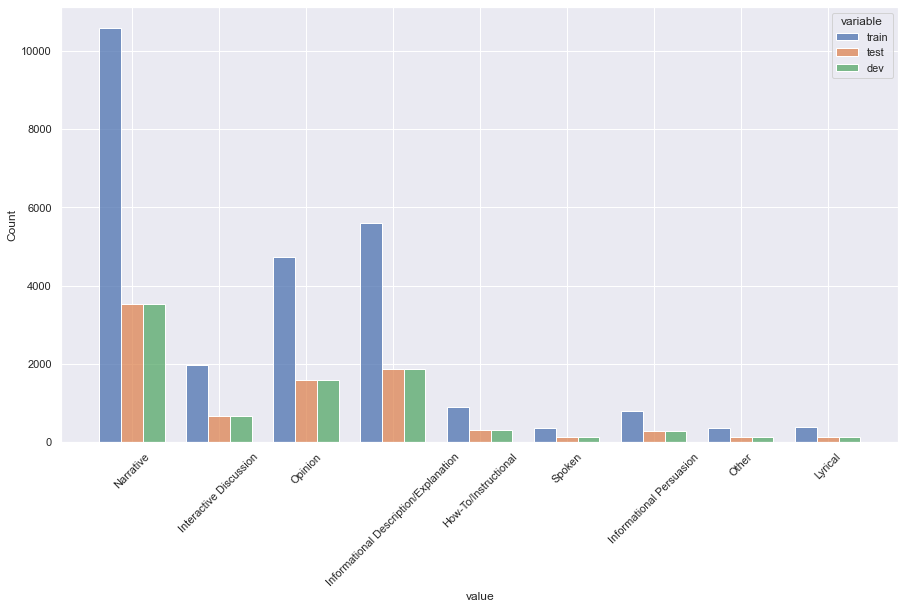

In [158]:
# Observe the distribution of the labels in all sets.
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=45)

In [159]:
df.describe()

,train,test,dev
count,25640,8547,8547
unique,9,9,9
top,Narrative,Narrative,Narrative
freq,10595,3532,3532


In [160]:
# Save the new files as CSV
train.to_csv("data/CORE-main-train.csv")
test.to_csv("data/CORE-main-test.csv")
dev.to_csv("data/CORE-main-dev.csv")

### CORE-sub

Here, we will use the texts, annotated with CORE subcategories. We will discard all texts that have multiple labels.

In [183]:
dataset_df.head(3)

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2,2,NA OP SR OB,SR OB,NA OP
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News,News Report/Blog,Narrative
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion


In [185]:
core_sub = dataset_df[dataset_df["sub_len"] == 1]
core_sub.head(3)

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News,News Report/Blog,Narrative
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1,1,News,Sports Report,Narrative


In [186]:
# Let's discard all instances that do not have any subcategory label
core_sub = core_sub[core_sub["sublabels"] != ""]
core_sub.head(3)

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NA,NE,2,1,1,News,News Report/Blog,Narrative
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NA,SR,2,1,1,News,Sports Report,Narrative


In [187]:
len(core_sub.sublabels.unique())

47

In [188]:
print(core_sub.full_names.value_counts().to_markdown())

|                                 |   full_names |
|:--------------------------------|-------------:|
| News Report/Blog                |        10503 |
| Opinion Blog                    |         4135 |
| Description of a Thing          |         3508 |
| Sports Report                   |         2820 |
| Personal Blog                   |         2769 |
| Discussion Forum                |         1950 |
| Reviews                         |         1803 |
| Information Blog                |         1526 |
| How-to                          |         1318 |
| Description with Intent to Sell |         1093 |
| Question/Answer Forum           |         1052 |
| Advice                          |          933 |
| Research Article                |          822 |
| Description of a Person         |          764 |
| Religious Blogs/Sermons         |          697 |
| Song Lyrics                     |          543 |
| Encyclopedia Article            |          522 |
| Interview                    

In [190]:
print(core_sub.full_names.value_counts(normalize= True).mul(100).to_markdown())

|                                 |   full_names |
|:--------------------------------|-------------:|
| News Report/Blog                |  26.3458     |
| Opinion Blog                    |  10.3722     |
| Description of a Thing          |   8.79948    |
| Sports Report                   |   7.0737     |
| Personal Blog                   |   6.94577    |
| Discussion Forum                |   4.89139    |
| Reviews                         |   4.52265    |
| Information Blog                |   3.82782    |
| How-to                          |   3.30608    |
| Description with Intent to Sell |   2.74168    |
| Question/Answer Forum           |   2.63884    |
| Advice                          |   2.34034    |
| Research Article                |   2.06191    |
| Description of a Person         |   1.91642    |
| Religious Blogs/Sermons         |   1.74836    |
| Song Lyrics                     |   1.36206    |
| Encyclopedia Article            |   1.30939    |
| Interview                    

In [191]:
# Discard categories with less than 10 instances
core_sub = core_sub[core_sub["full_names"] != "Other How-to"]
core_sub = core_sub[core_sub["full_names"] != "Other Lyrical"]
core_sub = core_sub[core_sub["full_names"] != "Other Narrative"]

core_sub.describe()

,Len,main_len,sub_len
count,39849.000000,39849.000000,39849.0
mean,2.063239,1.063239,1.0
std,0.243395,0.243395,0.0
min,2.000000,1.000000,1.0
25%,2.000000,1.000000,1.0
50%,2.000000,1.000000,1.0
75%,2.000000,1.000000,1.0
max,3.000000,2.000000,1.0


In [193]:
# Prepare the dataset for training
core_sub = core_sub[["text", "full_names"]]
core_sub

,text,full_names
1,"Ferry consultation needs deeper questions, say...",News Report/Blog
2,I'v been recording and mixing music for about ...,Discussion Forum
3,The 25-year-old did have chances at Anfield. B...,Sports Report
4,Elizabethan Science and Technology Elizabethan...,Historical Article
5,The value of NYC housing construction starts m...,News Report/Blog
...,...,...
48441,Search smh: Search in: Stoner has earned the r...,Sports Report
48444,Lollapalooza heading to the Middle East in 201...,News Report/Blog
48445,How to: Improve Brand Engagement on Twitter Ea...,Advice
48446,The Last Post. A shameful reflection on Canada...,Opinion Blog


In [194]:
core_sub.columns = ["text", "labels"]
core_sub.head(3)

,text,labels
1,"Ferry consultation needs deeper questions, say...",News Report/Blog
2,I'v been recording and mixing music for about ...,Discussion Forum
3,The 25-year-old did have chances at Anfield. B...,Sports Report


In [195]:
# Split the dataset (stratified split according to the label)
train, devtest = train_test_split(core_sub, test_size=0.4, random_state=42, shuffle = True, stratify = core_sub.labels)

In [196]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

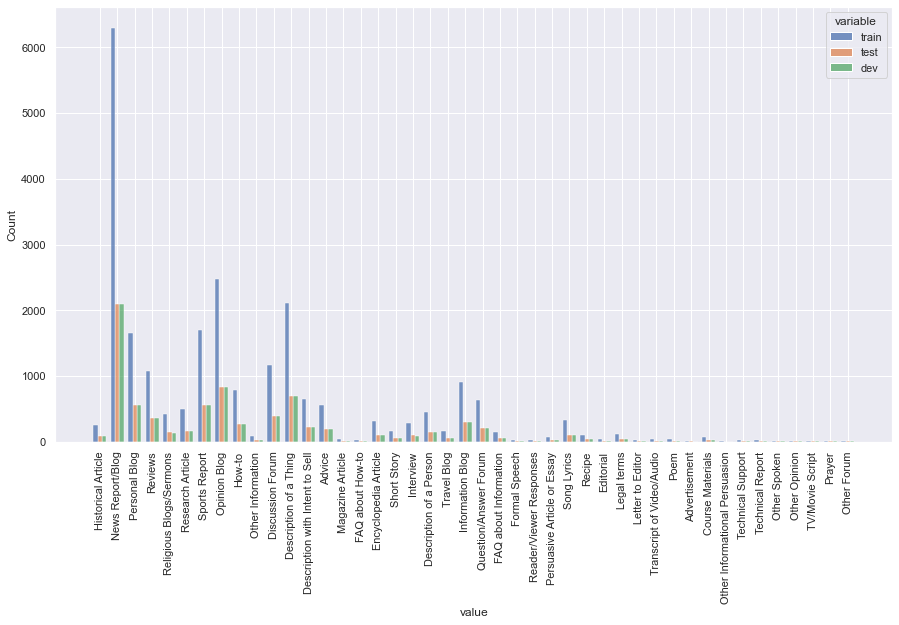

In [198]:
# Observe the distribution of the labels in all sets.
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=90)

In [199]:
df.describe()

,train,test,dev
count,23909,7970,7970
unique,44,44,44
top,News Report/Blog,News Report/Blog,News Report/Blog
freq,6302,2101,2100


In [200]:
# Save the new files as CSV
train.to_csv("data/CORE-sub-train.csv")
test.to_csv("data/CORE-sub-test.csv")
dev.to_csv("data/CORE-sub-dev.csv")